In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/api_data.csv')
df.head(10)

,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
0,ETHBTC,2.900000e-04,0.473,0.061599,0.061360,0.061650,0.1779,0.061640,23.5166,0.061650,...,0.061360,0.061820,0.061300,10581.2773,651.792232,1694780875658,1694867275658,423038379,423060691,22313
1,LTCBTC,4.700000e-05,1.962,0.002460,0.002395,0.002443,0.4680,0.002443,147.6760,0.002444,...,0.002396,0.002508,0.002392,84431.0450,207.697262,1694780872322,1694867272322,93481427,93499044,17618
2,BNBBTC,4.100000e-05,0.510,0.008061,0.008032,0.008073,0.2160,0.008073,16.1380,0.008074,...,0.008032,0.008115,0.007997,28931.5380,233.204961,1694780872323,1694867272323,227082279,227112894,30616
3,NEOBTC,9.000000e-07,0.327,0.000277,0.000275,0.000276,25.9100,0.000276,28.2900,0.000276,...,0.000275,0.000280,0.000274,7770.9400,2.152178,1694780870049,1694867270049,45509016,45510231,1216
4,QTUMETH,2.100000e-05,1.580,0.001356,0.001326,0.001350,1.2000,0.001348,123.0000,0.001354,...,0.001329,0.001375,0.001329,1950.0000,2.644293,1694780858346,1694867258346,5401880,5401964,85
5,EOSETH,4.400000e-06,1.269,0.000350,0.000349,0.000351,19.1000,0.000351,545.3000,0.000352,...,0.000347,0.000354,0.000347,8216.7000,2.877508,1694780869766,1694867269766,23497564,23497651,88
6,SNTETH,-2.000000e-08,-0.147,0.000014,0.000014,0.000014,4009.0000,0.000014,4476.0000,0.000014,...,0.000014,0.000014,0.000014,157042.0000,2.148326,1694780842819,1694867242819,3906790,3906847,58
7,BNTETH,1.690000e-05,6.960,0.000263,0.000244,0.000260,40.5000,0.000259,78.3000,0.000260,...,0.000243,0.000280,0.000242,147050.1000,38.708081,1694780874574,1694867274574,2233450,2234893,1444
8,BCCBTC,0.000000e+00,0.000,0.000000,0.079081,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,1689573255866,1689659655866,-1,-1,0
9,GASBTC,1.600000e-06,1.822,0.000089,0.000088,0.000089,68.9000,0.000089,10.9000,0.000089,...,0.000088,0.000090,0.000088,28233.4000,2.515544,1694780827433,1694867227433,20795223,20797991,2769


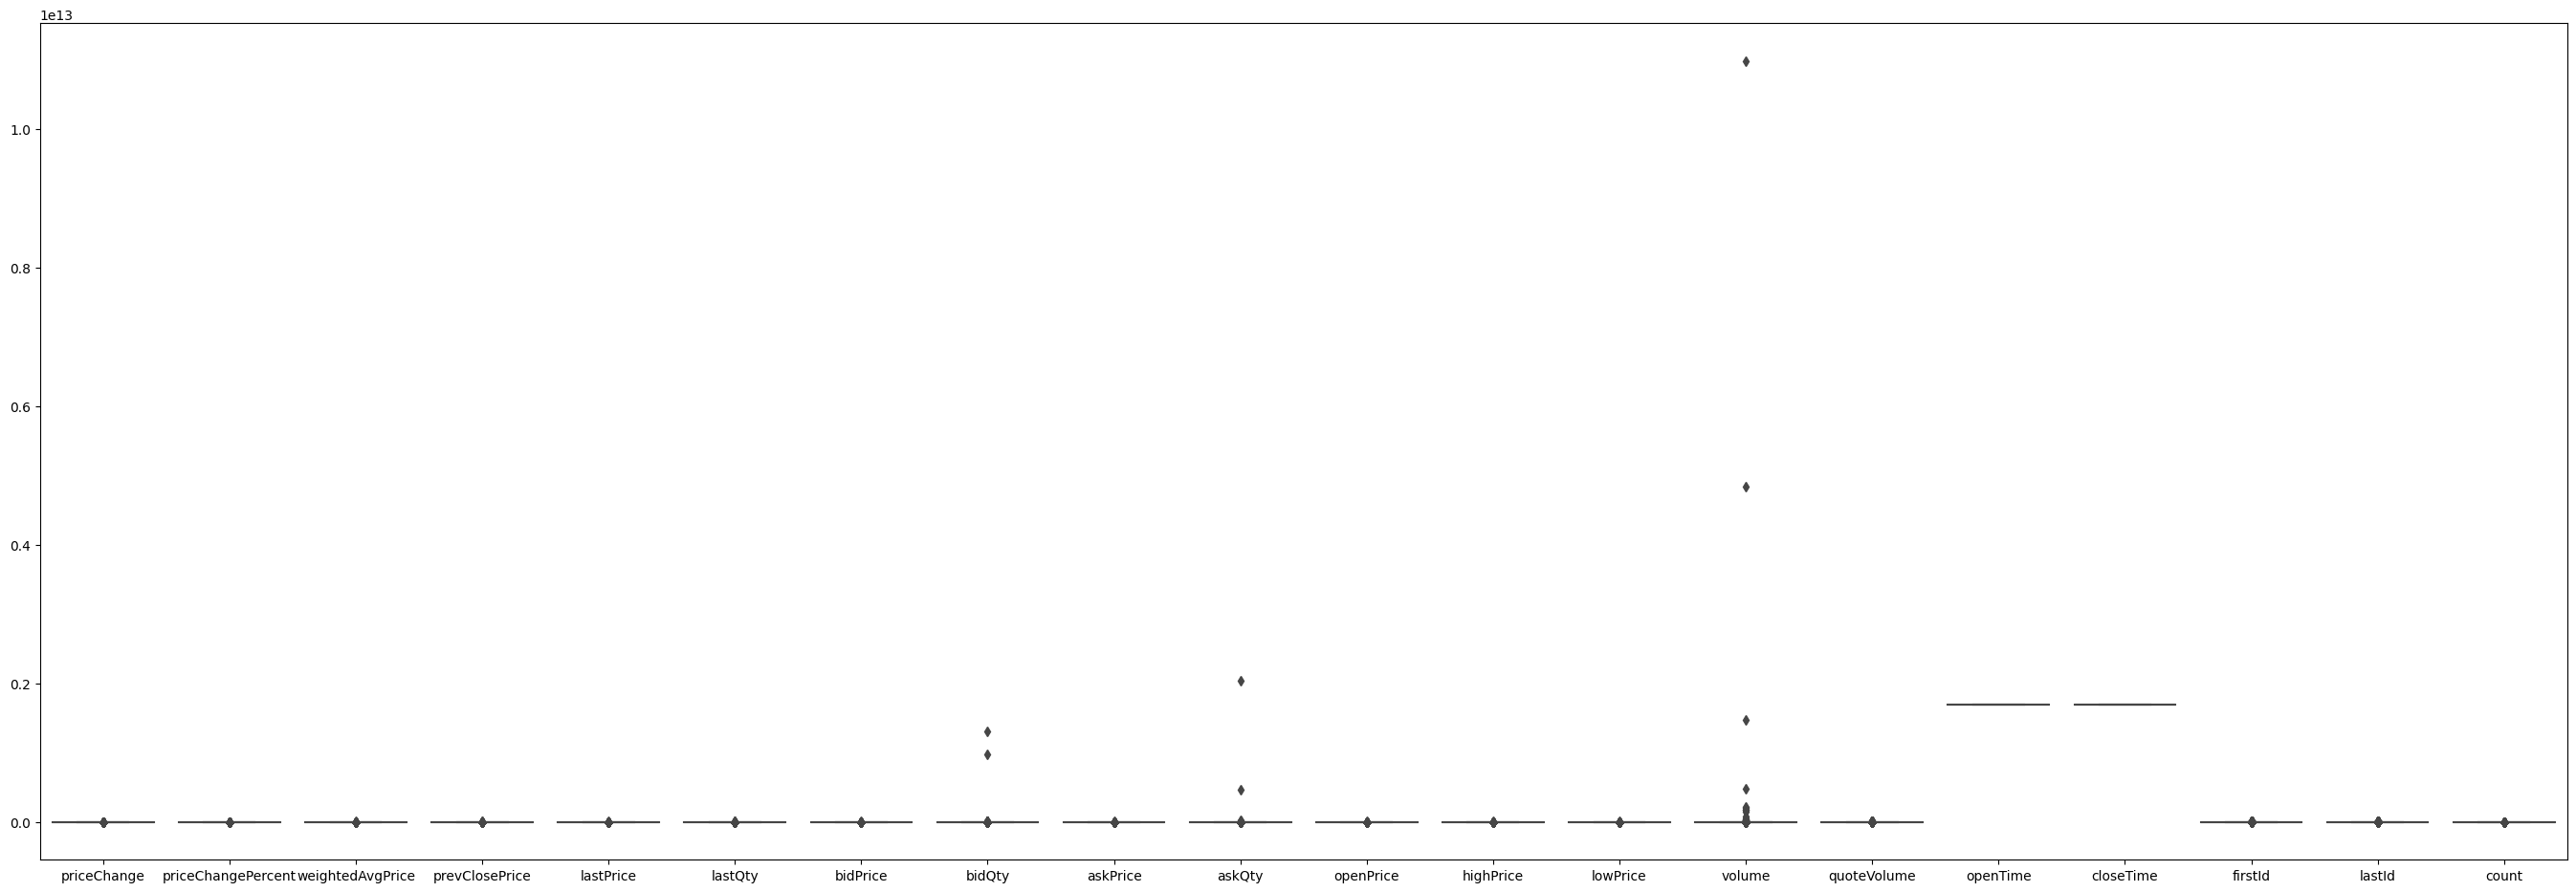

In [ ]:
plt.figure(figsize=(75,25))
plt.subplot(2,2,4)
sns.boxplot(df)
plt.show()

In [ ]:
print('There are outliers present in some of the columns,so we will work on those specific columns to detect and remove outliers present in the dataset')

There are outliers present in some of the columns,so we will work on those specific columns to detect and remove outliers present in the dataset


In [ ]:
n= df.select_dtypes(include=[np.number])
list=[]
c=0
for i in n:
  c=c+1
  list.append(i)
print(c)
print(list)

20
['priceChange', 'priceChangePercent', 'weightedAvgPrice', 'prevClosePrice', 'lastPrice', 'lastQty', 'bidPrice', 'bidQty', 'askPrice', 'askQty', 'openPrice', 'highPrice', 'lowPrice', 'volume', 'quoteVolume', 'openTime', 'closeTime', 'firstId', 'lastId', 'count']


In [ ]:
Q1 = df['bidQty'].quantile(0.25)
Q3 = df['bidQty'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[df['bidQty'] > upper].count()
upper_array = np.where(df['bidQty']>=upper)[0]
lower_array = np.where(df['bidQty']<=lower)[0]
print("Upper Bound:",upper)
print(upper_array.sum())
print("Lower Bound:",lower)
print(lower_array.sum())
new_df = df[df['bidQty'] < upper]
new_df.head()

0.0 1012.825
1012.825
Upper Bound: 2532.0625
509644
Lower Bound: -1519.2375000000002
0


,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
0,ETHBTC,2.900000e-04,0.473,0.061599,0.061360,0.061650,0.1779,0.061640,23.5166,0.061650,...,0.061360,0.061820,0.061300,10581.2773,651.792232,1694780875658,1694867275658,423038379,423060691,22313
1,LTCBTC,4.700000e-05,1.962,0.002460,0.002395,0.002443,0.4680,0.002443,147.6760,0.002444,...,0.002396,0.002508,0.002392,84431.0450,207.697262,1694780872322,1694867272322,93481427,93499044,17618
2,BNBBTC,4.100000e-05,0.510,0.008061,0.008032,0.008073,0.2160,0.008073,16.1380,0.008074,...,0.008032,0.008115,0.007997,28931.5380,233.204961,1694780872323,1694867272323,227082279,227112894,30616
3,NEOBTC,9.000000e-07,0.327,0.000277,0.000275,0.000276,25.9100,0.000276,28.2900,0.000276,...,0.000275,0.000280,0.000274,7770.9400,2.152178,1694780870049,1694867270049,45509016,45510231,1216
4,QTUMETH,2.100000e-05,1.580,0.001356,0.001326,0.001350,1.2000,0.001348,123.0000,0.001354,...,0.001329,0.001375,0.001329,1950.0000,2.644293,1694780858346,1694867258346,5401880,5401964,85


In [ ]:
new_df_cap = df.copy()
new_df_cap['bidQty'] = np.where(
    new_df_cap['bidQty'] > upper,
    upper,
    np.where(
        new_df_cap['bidQty'] < lower,
        lower,
        new_df_cap['bidQty']
    )
)

<Axes: >

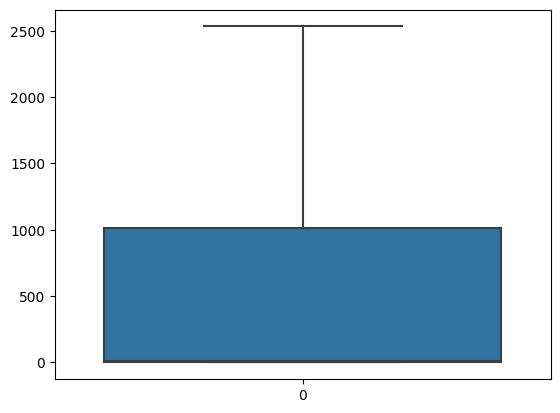

In [ ]:
sns.boxplot(new_df_cap['bidQty'])

0.0 950.235
950.235
Upper Bound: 2375.5875
557915
Lower Bound: -1425.3525
0


<Axes: >

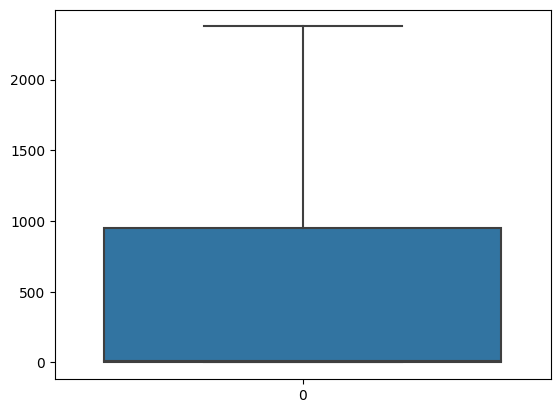

In [ ]:
Q1 = df['askQty'].quantile(0.25)
Q3 = df['askQty'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[df['askQty'] > upper].count()
upper_array = np.where(df['askQty']>=upper)[0]
lower_array = np.where(df['askQty']<=lower)[0]
print("Upper Bound:",upper)
print(upper_array.sum())
print("Lower Bound:",lower)
print(lower_array.sum())
new_df = df[df['askQty'] < upper]
new_df.head()
new_df_cap = df.copy()
new_df_cap['askQty'] = np.where(
    new_df_cap['askQty'] > upper,
    upper,
    np.where(
        new_df_cap['askQty'] < lower,
        lower,
        new_df_cap['askQty']
    )
)
sns.boxplot(new_df_cap['askQty'])

0.0 720119.75
720119.75
Upper Bound: 1800299.375
558740
Lower Bound: -1080179.625
0


<Axes: >

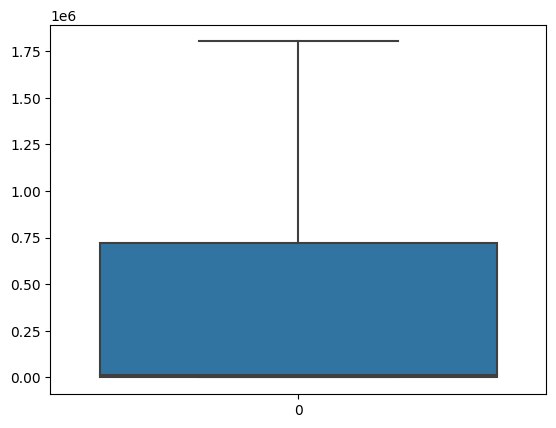

In [ ]:
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[df['volume'] > upper].count()
upper_array = np.where(df['volume']>=upper)[0]
lower_array = np.where(df['volume']<=lower)[0]
print("Upper Bound:",upper)
print(upper_array.sum())
print("Lower Bound:",lower)
print(lower_array.sum())
new_df = df[df['volume'] < upper]
new_df.head()
new_df_cap = df.copy()
new_df_cap['volume'] = np.where(
    new_df_cap['volume'] > upper,
    upper,
    np.where(
        new_df_cap['volume'] < lower,
        lower,
        new_df_cap['volume']
    )
)
sns.boxplot(new_df_cap['volume'])

0.0 720119.75
720119.75
Upper Bound: 1800299.375
558740
Lower Bound: -1080179.625
0


<Axes: >

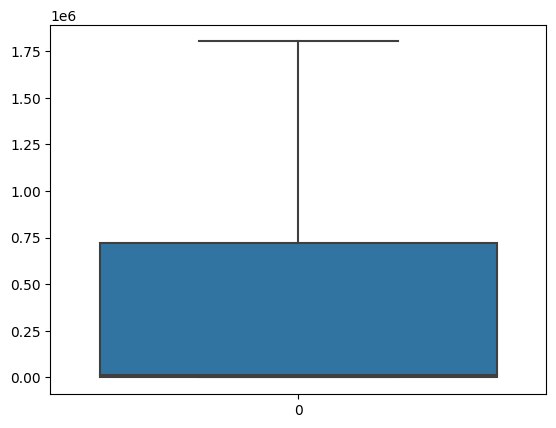

In [ ]:
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[df['volume'] > upper].count()
upper_array = np.where(df['volume']>=upper)[0]
lower_array = np.where(df['volume']<=lower)[0]
print("Upper Bound:",upper)
print(upper_array.sum())
print("Lower Bound:",lower)
print(lower_array.sum())
new_df = df[df['volume'] < upper]
new_df.head()
new_df_cap = df.copy()
new_df_cap['volume'] = np.where(
    new_df_cap['volume'] > upper,
    upper,
    np.where(
        new_df_cap['volume'] < lower,
        lower,
        new_df_cap['volume']
    )
)
sns.boxplot(new_df_cap['volume'])

-1.0 9729252.0
9729253.0
Upper Bound: 24323131.5
242518
Lower Bound: -14593880.5
0


<Axes: >

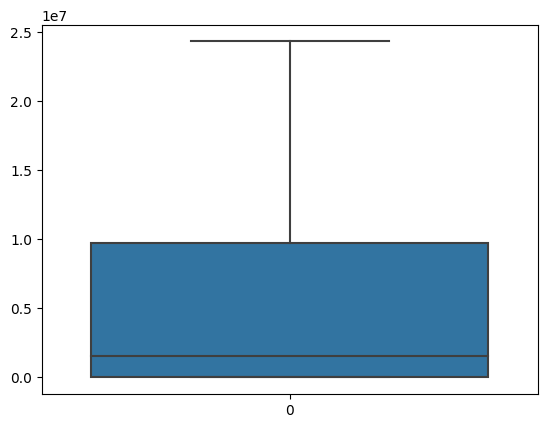

In [ ]:
Q1 = df['firstId'].quantile(0.25)
Q3 = df['firstId'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[df['firstId'] > upper].count()
upper_array = np.where(df['firstId']>=upper)[0]
lower_array = np.where(df['firstId']<=lower)[0]
print("Upper Bound:",upper)
print(upper_array.sum())
print("Lower Bound:",lower)
print(lower_array.sum())
new_df = df[df['firstId'] < upper]
new_df.head()
new_df_cap = df.copy()
new_df_cap['firstId'] = np.where(
    new_df_cap['firstId'] > upper,
    upper,
    np.where(
        new_df_cap['firstId'] < lower,
        lower,
        new_df_cap['firstId']
    )
)
sns.boxplot(new_df_cap['firstId'])

-1.0 9732778.0
9732779.0
Upper Bound: 24331946.5
242518
Lower Bound: -14599169.5
0


<Axes: >

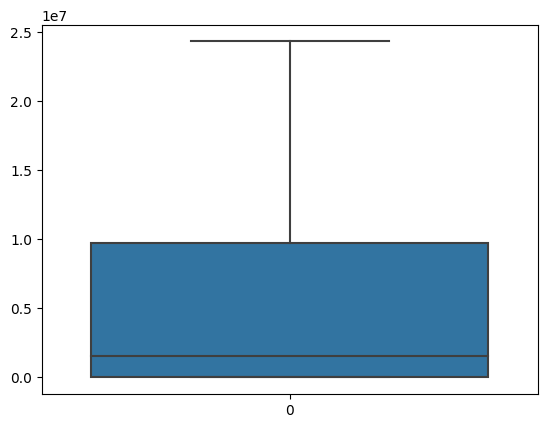

In [ ]:
Q1 = df['lastId'].quantile(0.25)
Q3 = df['lastId'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[df['lastId'] > upper].count()
upper_array = np.where(df['lastId']>=upper)[0]
lower_array = np.where(df['lastId']<=lower)[0]
print("Upper Bound:",upper)
print(upper_array.sum())
print("Lower Bound:",lower)
print(lower_array.sum())
new_df = df[df['lastId'] < upper]
new_df.head()
new_df_cap = df.copy()
new_df_cap['lastId'] = np.where(
    new_df_cap['lastId'] > upper,
    upper,
    np.where(
        new_df_cap['lastId'] < lower,
        lower,
        new_df_cap['lastId']
    )
)
sns.boxplot(new_df_cap['lastId'])

0.0 2371.5
2371.5
Upper Bound: 5928.75
413776
Lower Bound: -3557.25
0


<Axes: >

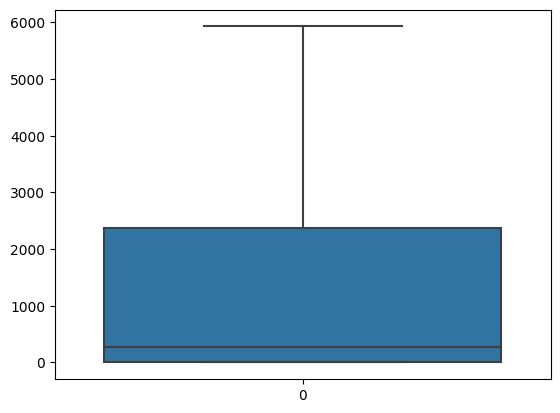

In [ ]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[df['count'] > upper].count()
upper_array = np.where(df['count']>=upper)[0]
lower_array = np.where(df['count']<=lower)[0]
print("Upper Bound:",upper)
print(upper_array.sum())
print("Lower Bound:",lower)
print(lower_array.sum())
new_df = df[df['count'] < upper]
new_df.head()
new_df_cap = df.copy()
new_df_cap['count'] = np.where(
    new_df_cap['count'] > upper,
    upper,
    np.where(
        new_df_cap['count'] < lower,
        lower,
        new_df_cap['count']
    )
)
sns.boxplot(new_df_cap['count'])

In [ ]:
print('We can see that there is distribution between Q1 and Q2 and outliers are detected and removed from specific columns where we have outliers. Hence the given dataset has no outliers')

We can see that there is distribution between Q1 and Q2 and outliers are detected and removed from specific columns where we have outliers. Hence the given dataset has no outliers
